In [1]:
using Plots
using PGFPlotsX
using LaTeXStrings
using BrownianDynamics
using OffsetArrays
using LinearAlgebra
using Statistics
using JLD2

┌ Info: Recompiling stale cache file /home/jackd/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/jackd/.julia/compiled/v1.1/PGFPlotsX/ckKEQ.ji for PGFPlotsX [8314cec4-20b6-5062-9cdb-752b83310925]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/jackd/.julia/compiled/v1.1/BrownianDynamics/tUOSF.ji for BrownianDynamics [9aaca010-545f-11e9-1f13-43a2532b2fa8]
└ @ Base loading.jl:1184


# Choose mesh size

In [2]:
nx = 300
ny = 300

300

# Heat Engine

norm([du; sum(u[1:nn]) * dx * dy - 1]) / nn = 0.0026581114895151865
 52.335640 seconds (23.37 M allocations: 12.696 GiB, 6.41% gc time)
sum(Jx) * dx * dy = -0.0031441761241762073
(norm(flux!(copy(u0), u_steady_heat_engine, params_heat_engine, 0)) / nx) / ny = 0.002522951860237367


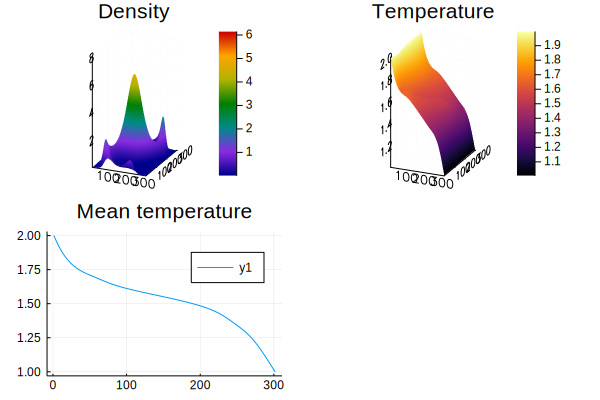

In [3]:
xx = range(0,stop=1,length=nx)
yy = range(-1,stop=1,length=ny)
## Choose parameters.
Tc = 1.0; Th = 2.0; coupling = 0.2; p = [0.2,15,1,2]
u0,params_heat_engine = create_system(xx,yy,Tc,Th,coupling,p;potential_type=:curved_channel)
## Solve for the steady state.
@time u_steady_heat_engine = solve_steady_state(u0,params_heat_engine;maxiters=15,steadytol=1e-14)
Jx,Jy = density_current((xx,yy),u_steady_heat_engine,params_heat_engine)
dx = params_heat_engine.dx
dy = params_heat_engine.dy
@show sum(Jx)*dx*dy
@show norm(flux!(copy(u0),u_steady_heat_engine,params_heat_engine,0))/nx/ny
## Visualize.
p1 = surface(reshape(u_steady_heat_engine[1:nx*ny],nx,ny),color=:darktest)
title!("Density")
p2 = surface(reshape(u_steady_heat_engine[nx*ny+1:end],nx,ny))
title!("Temperature")
Tsol_heat_engine = reshape(u_steady_heat_engine[(nx*ny+1):end],nx,ny)
Tsol_heat_engine = [ones(nx)*Th Tsol_heat_engine ones(nx)*Tc]
p3 = plot([mean(Tsol_heat_engine[:,i]) for i in 1:nx+2])
title!("Mean temperature")
plot(p1,p2,p3)

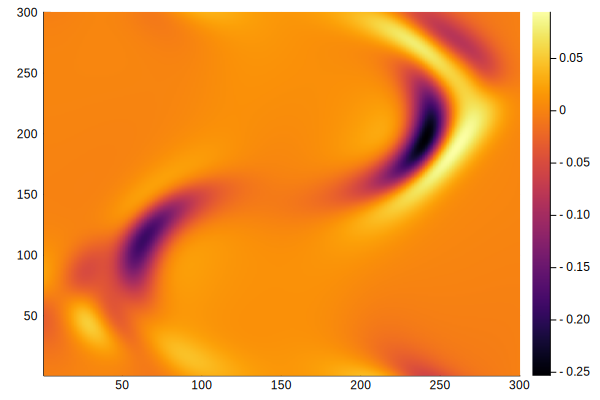

In [4]:
heatmap(Jx)

# Loss process

norm([du; sum(u[1:nn]) * dx * dy - 1]) / nn = 4.903959391606751e-6
 44.273266 seconds (10.65 k allocations: 11.653 GiB, 7.47% gc time)
(norm(flux!(copy(u0), u_steady_loss_process, params_loss_process, 0)) / nx) / ny = 4.10128055173084e-6


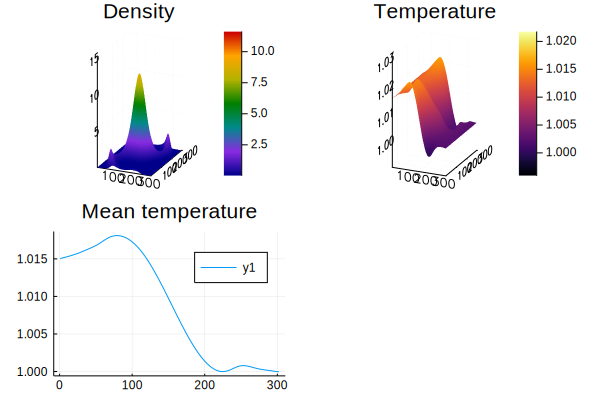

In [5]:
xx = range(-0.0,stop=1.0,length=nx)
yy = range(-1.0,stop=1.0,length=ny)
## Choose parameters.
Tc = 1.0; Th = 1.015; coupling = 0.2; p = [0.2,15,1,2]
u0,params_loss_process = create_system(xx,yy,Tc,Th,coupling,p;potential_type=:curved_channel)
## Solve for the steady state.
@time u_steady_loss_process = solve_steady_state(u0,params_loss_process;maxiters=15,steadytol=1e-14)
@show norm(flux!(copy(u0),u_steady_loss_process,params_loss_process,0))/nx/ny
## Visualize.
p1 = surface(reshape(u_steady_loss_process[1:nx*ny],nx,ny),color=:darktest)
title!("Density")
p2 = surface(reshape(u_steady_loss_process[nx*ny+1:end],nx,ny))
title!("Temperature")
Tsol_loss_process = reshape(u_steady_loss_process[(nx*ny+1):end],nx,ny)
Tsol_loss_process = [ones(nx)*Th Tsol_loss_process ones(nx)*Tc]
p3 = plot([mean(Tsol_loss_process[:,i]) for i in 1:nx+2])
title!("Mean temperature")
plot(p1,p2,p3)

# Heat Pump

norm([du; sum(u[1:nn]) * dx * dy - 1]) / nn = 2.8815906586112353e-6
 45.328161 seconds (24.73 k allocations: 11.654 GiB, 7.33% gc time)
(norm(flux!(copy(u0), u_steady_heat_pump, params_heat_pump, 0)) / nx) / ny = 2.413205057688978e-6


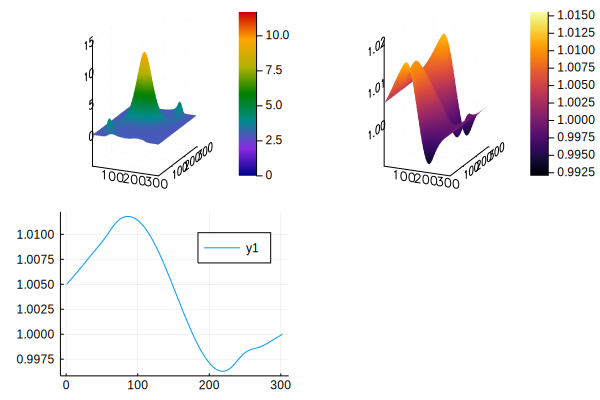

In [6]:
xx = range(0,stop=1,length=nx)
yy = range(-1,stop=1,length=ny)
## Choose parameters.
Tc = 1.0; Th = 1.005; coupling = 0.2; p = [0.2,15,1,2]
u0,params_heat_pump = create_system(xx,yy,Tc,Th,coupling,p;potential_type=:curved_channel)
## Solve for the steady state.
@time u_steady_heat_pump = solve_steady_state(u0,params_heat_pump;maxiters=15,steadytol=1e-14,autodiff=false)
@show norm(flux!(copy(u0),u_steady_heat_pump,params_heat_pump,0))/nx/ny
## Visualize.
p1 = surface(reshape(u_steady_heat_pump[1:nx*ny],nx,ny),color=:darktest)
p2 = surface(reshape(u_steady_heat_pump[nx*ny+1:end],nx,ny))
Tsol_heat_pump = reshape(u_steady_heat_pump[(nx*ny+1):end],nx,ny)
Tsol_heat_pump = [ones(nx)*Th Tsol_heat_pump ones(nx)*Tc]
p3 = plot([mean(Tsol_heat_pump[:,i]) for i in 1:nx+2])
plot(p1,p2,p3)

# Single channel

norm([du; sum(u[1:nn]) * dx * dy - 1]) / nn = 0.0002805496903220076
 44.694005 seconds (10.65 k allocations: 11.653 GiB, 7.38% gc time)
(norm(flux!(copy(u0), u_steady_single_channel, params_single_channel, 0)) / nx) / ny = 0.0002634336937341827


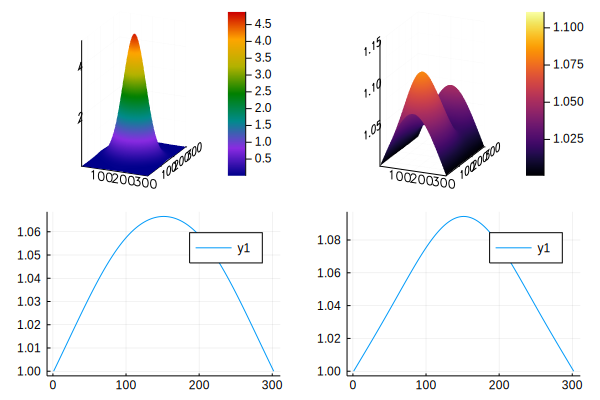

In [7]:
xx = range(0,stop=1,length=nx)
yy = range(-1,stop=1,length=ny)
## Choose parameters.
Tc = 1.0; Th = 1.0; coupling = 1.0; ## p = [2,3,5]
p = [2,3,5]
u0,params_single_channel = create_system(xx,yy,Tc,Th,coupling,p,potential_type=:tilted_channel)
## Solve for the steady state.
@time u_steady_single_channel = solve_steady_state(u0,params_single_channel;maxiters=15,steadytol=1e-14)
@show norm(flux!(copy(u0),u_steady_single_channel,params_single_channel,0))/nx/ny
## Visualize.
p1 = surface(reshape(u_steady_single_channel[1:nx*ny],nx,ny),color=:darktest)
p2 = surface(reshape(u_steady_single_channel[nx*ny+1:end],nx,ny))
Tsol_single_channel = reshape(u_steady_single_channel[(nx*ny+1):end],nx,ny)
Tsol_single_channel = [ones(nx)*Th Tsol_single_channel ones(nx)*Tc]
p3 = plot([mean(Tsol_single_channel[:,i]) for i in 1:nx+2])
p4 = plot(Tsol_single_channel[30,:])
plot(p1,p2,p3,p4)

# Tight channel

norm([du; sum(u[1:nn]) * dx * dy - 1]) / nn = 2.4029394121151786e-10
 44.552892 seconds (10.65 k allocations: 11.666 GiB, 7.48% gc time)
(norm(flux!(copy(u0), u_steady_tight_channel, params_tight_channel, 0)) / nx) / ny = 2.0928647896168093e-10


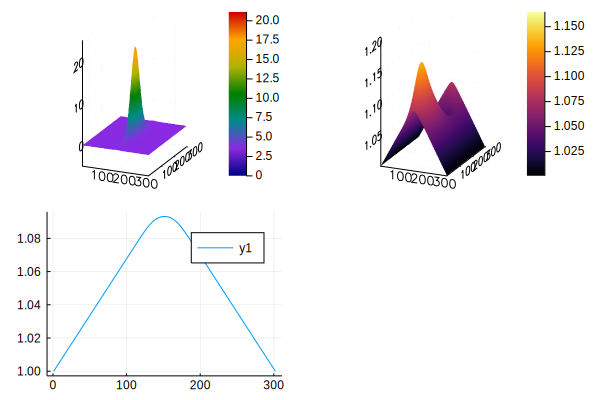

In [8]:
xx = range(0,stop=1,length=nx)
yy = range(-1,stop=1,length=ny)
## Choose parameters.
Tc = 1.0; Th = 1.0; coupling = 1.0; p = [2,3,100]
u0,params_tight_channel = create_system(xx,yy,Tc,Th,coupling,p,potential_type=:tilted_channel)
## Solve for the steady state.
@time u_steady_tight_channel = solve_steady_state(u0,params_tight_channel;maxiters=15,steadytol=1e-14)
@show norm(flux!(copy(u0),u_steady_tight_channel,params_tight_channel,0))/nx/ny
## Visualize.
p1 = surface(reshape(u_steady_tight_channel[1:nx*ny],nx,ny),color=:darktest)
p2 = surface(reshape(u_steady_tight_channel[nx*ny+1:end],nx,ny))
Tsol_tight_channel = reshape(u_steady_tight_channel[(nx*ny+1):end],nx,ny)
Tsol_tight_channel = [ones(nx)*Th Tsol_tight_channel ones(nx)*Tc]
p3 = plot([mean(Tsol_tight_channel[:,i]) for i in 1:nx+2])
#p3 = plot(Tsol_tight_channel[7,:])
plot(p1,p2,p3)

# Double channel

norm([du; sum(u[1:nn]) * dx * dy - 1]) / nn = 5.3420797987737095e-8
 44.549889 seconds (10.65 k allocations: 11.666 GiB, 7.45% gc time)
(norm(flux!(copy(u0), u_steady_double_channel, params_double_channel, 0)) / nx) / ny = 3.848661667764838e-8


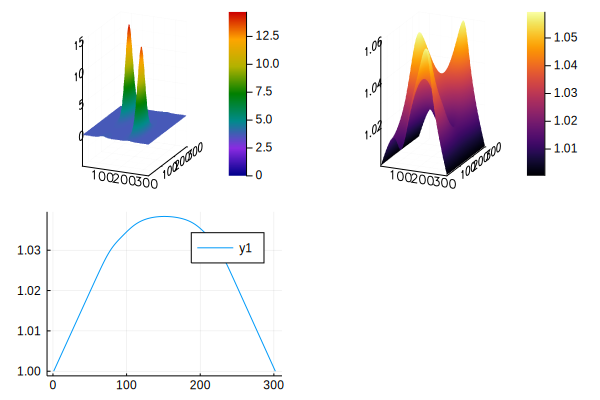

In [9]:
xx = range(0,stop=1,length=nx)
yy = range(-1,stop=1,length=ny)
## Choose parameters.
Tc = 1.0; Th = 1.0; coupling = 1.0; p = 1.0*[2,4,4,10,10,20]
u0,params_double_channel = create_system(xx,yy,Tc,Th,coupling,p,potential_type=:double_channel)
## Solve for the steady state.
@time u_steady_double_channel = solve_steady_state(u0,params_double_channel;maxiters=15,steadytol=1e-14)
@show norm(flux!(copy(u0),u_steady_double_channel,params_double_channel,0))/nx/ny
## Visualize.
p1 = surface(reshape(u_steady_double_channel[1:nx*ny],nx,ny),color=:darktest)
p2 = surface(reshape(u_steady_double_channel[nx*ny+1:end],nx,ny))
Tsol_double_channel = reshape(u_steady_double_channel[(nx*ny+1):end],nx,ny)
Tsol_double_channel = [ones(nx)*Th Tsol_double_channel ones(nx)*Tc]
p3 = plot([mean(Tsol_double_channel[:,i]) for i in 1:nx+2])
plot(p1,p2,p3)

# Paper Figure

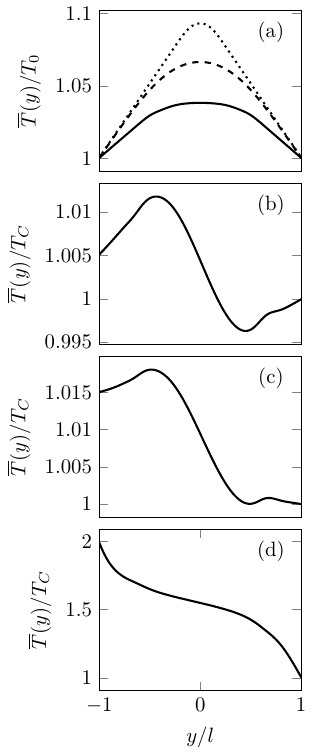

In [10]:
yy_extend = [yy[1]-step(yy);yy;yy[end]+step(yy)]
single_channel_table = Table([yy_extend,[mean(Tsol_single_channel[:,i]) for i in 1:ny+2]])
tight_channel_table = Table([yy_extend,[mean(Tsol_tight_channel[:,i]) for i in 1:ny+2]])
double_channel_table = Table([yy_extend,[mean(Tsol_double_channel[:,i]) for i in 1:ny+2]])
yy_extend = [yy[1]-step(yy);yy;yy[end]+step(yy)]
heat_pump_table = Table([yy_extend,[mean(Tsol_heat_pump[:,i]) for i in 1:ny+2]])
loss_process_table = Table([yy_extend,[mean(Tsol_loss_process[:,i]) for i in 1:ny+2]])
heat_engine_table = Table([yy_extend,[mean(Tsol_heat_engine[:,i]) for i in 1:ny+2]])
@pgf begin
    raw"\pgfplotsset{ylabsh/.style={every axis y label/.style={at={(0,0.5)}, xshift=#1, rotate=90}}}"
    p = GroupPlot(
    {
        group_style=
        {
            group_size="1 by 4",
            vertical_sep="0.2cm",
        },
#         ylabsh="-4em",
#         height="4cm",
        width="5cm",
        no_markers,
    yticklabel_style=raw"{/pgf/number format/.cd,fixed,precision=3}"
    },
    {
#      xlabel=L"y/l",
     ylabel=latexstring("\\overline{T}","(y)/T_{0}"),
     xmin=-1,xmax=1,
     xtick="\\empty"
    },
    PlotInc(
        {color="black",line_width=1},
        double_channel_table,
#         raw"node [pos=0.2,pin={-30:$\rm{Double Channel}$},inner sep=0pt] {};"
    ),
    PlotInc(
        {color="black",line_width=1,"dashed"},
        single_channel_table,
#         raw"node [pos=0.2,pin={-30:$\rm{Single Channel}$},inner sep=0pt] {};"
    ),
    PlotInc(
        {color="black",line_width=1,"dotted"},
        tight_channel_table,
        raw"node[label=(a)] at (rel axis cs:0.85,0.7) {};"
    ),
    {
#      xlabel=L"y/l",
     ylabel=latexstring("\\overline{T}","(y)/T_{C}"),
     xmin=-1,xmax=1,
     xtick="\\empty"
    },
    PlotInc(
        {color="black",line_width=1},
        heat_pump_table,
        raw"node[label=(b)] at (rel axis cs:0.85,0.7) {};"
    ),
    {ylabel=latexstring("\\overline{T}","(y)/T_{C}"),
     xmin=-1,xmax=1,
     xtick="\\empty",
#      ytick=[1,1.005,1.01]
    },
    PlotInc(
        {color="black",line_width=1},
        loss_process_table,
        raw"node[label=(c)] at (rel axis cs:0.85,0.7) {};"
    ),
    {xlabel=L"y/l",
     xtick=[-1,0,1],
     ylabel=latexstring("\\overline{T}","(y)/T_{C}"),
     xmin=-1,xmax=1},
    PlotInc(
        {color="black",line_width=1},
        heat_engine_table,
        raw"node[label=(d)] at (rel axis cs:0.85,0.7) {};"
    ),
)
end

# Save figure

In [11]:
pgfsave("data/figures/heatDissipation.tex",p,include_preamble=false)
pgfsave("data/figures/heatDissipation.pdf",p)

# Save data

In [12]:
using Dates

In [13]:
date = Dates.today()

@show fname = "data/heat_dissipation$(date)"

@save("$(fname).jld",params_double_channel,u_steady_double_channel,params_single_channel,u_steady_single_channel,
 params_tight_channel,u_steady_tight_channel,params_heat_pump,u_steady_heat_pump,
 params_heat_engine,u_steady_heat_engine)

fname = "data/heat_dissipation$(date)" = "data/heat_dissipation2019-05-13"


In [14]:
fname = "data/steady_state_heat_engine$(date)"
p = [0,10,10,4]
potential = (x,y) -> (-p[1]*x-p[2]*exp(-0.5*(-sin(2π*x)-sin(2π*(0.5y+0.5))+2cos(π*(0.5y+0.5)))^2)
                      +p[3]*(y)^4-p[4]*cos(2π*x)*cos(2π*(0.5y+0.5)))
V_equilibrium = [potential(x,y) for x in xx, y in yy]
u_steady = collect(u_steady_heat_engine)
params = params_heat_engine
T0 = Tc
@save "$(fname).jld" u_steady params xx yy T0 V_equilibrium

In [15]:
fname = "data/steady_state_heat_pump$(date)"

u_steady = collect(u_steady_heat_pump)
params = params_heat_pump
@save "$(fname).jld" u_steady params xx yy T0 V_equilibrium